In [1]:
import numpy as np
import os
import tifffile as tf
from utils.p1_pca_lda_ensemble_weight import *


# label
stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])


In [2]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly3/data',
                        '20230428-nsyb-G7f-rAch1h/fly1/data',
                        '20230507-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly3/data',
                        '20230515-nsyb-G7f-rAch1h/fly1/data']
file_folder_list_3 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
dff0_thresh_list = [0.5,1,0.5,0.5,0.5,1,1,0.5,1,1]
# Ach
region_c2 = np.array([7,12,16,17,18,19,23,26,27,28,29,34,39,55,59,63,64,65,66,72,73,74,79,84])
# 'LH_R','ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# 'AOTU_R','SCL-R','LH_L','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L','AOTU_L','SCL_L'
region_plus = np.array([12,16,17,18,19,23,26,28,39,59,63,64,65,66,73,84])
# 'ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SIP_R',
# 'SCL-R','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SIP_L','SCL_L'

# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']
# file_folder_list_3 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
#                 '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
#                 '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
# dff0_thresh_list = [1,1,1,1,1,1,1,1,1,1]
# # 5HT
# region_c2 = np.array([4,16,18,19,23,26,27,28,29,34,63,65,66,72,73,74,79])
# # 'NO','CRE_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# # 'AOTU_R','CRE_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L','AOTU_L'
# region_plus = np.array([18,65])
# # MBVL

In [3]:
## 1.parameters
# cv fold
cv_fold = 5
# channel_selected
list_channel_selected = [0,1,2]# 0-both channels; 1-G7f; 2-NM
num_channel_choice = len(list_channel_selected)
# thresholds for dimension reduction
list_thresh_pca_exp_var_1 = [0.9] # pca theshold-1
num_thresh_pca_exp_var_1 = len(list_thresh_pca_exp_var_1)
list_block_size = [0.1] # block sizes
num_block_size = len(list_block_size)
list_thresh_pca_exp_var_2 = np.arange(0,1,0.02)# pca theshold-2
num_thresh_points = len(list_thresh_pca_exp_var_2)
# odor classification conditions
list_odor_choice = [0] # 0-All; 1-no oct; 2-no mch; 3-no ea
num_odor_choice = len(list_odor_choice)
# plot
if_plot_figure = False
if_save_figure = True
# if_shuffle
if_shuffle = [False,True]
if_shuffle_flag = ['No_Shuffle','Shuffle']
num_shuffle_choice = len(if_shuffle)

## 2.read data
data_path = '../../data'
result_path = '../../../results/nsyb-G7f-rAch1h-ensemble_weight'
file_name = ['dff0_-6-80_down2_C2','dff0_-6-80_down2_C3']
atlas_path = data_path
atlas_name = 'align_to_atlas/Transformed_atlas.tif'
atlas_eroded_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
file_folders = file_folder_list_1
print(file_folders)
num_fly = len(file_folders)
num_channel = 2
atlas_z_range = range(13,38)


###
region_c1 = np.array([4,7,12,16,17,18,19,23,26,27,28,29,34,39,55,59,63,64,65,66,72,73,74,79,84])
# 'NO','LH_R','ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# 'AOTU_R','SCL-R','LH_L','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L',
# 'AOTU_L','SCL_L'

## parameters for PCA
pca_tp_range = range(4,18)
## parameters for LDA and SVM
lda_tp_selected = 6
svm_tp_range = range(4,18)


['20230417-nsyb-G7f-rAch1h/fly2/data', '20230420-nsyb-G7f-rAch1h/fly2/data', '20230420-nsyb-G7f-rAch1h/fly3/data', '20230428-nsyb-G7f-rAch1h/fly1/data', '20230507-nsyb-G7f-rAch1h/fly1/data', '20230510-nsyb-G7f-rAch1h/fly1/data', '20230510-nsyb-G7f-rAch1h/fly2/data', '20230511-nsyb-G7f-rAch1h/fly2/data', '20230511-nsyb-G7f-rAch1h/fly3/data', '20230515-nsyb-G7f-rAch1h/fly1/data']


20230511-nsyb-G7f-rAch1h/fly3/data
load data done! size:
(256, 256, 25, 43, 180, 2)
load atlas done! size:
(256, 256, 25)
load atlas_eroded done! size:
(256, 256, 25)
Voxel: channel 0
pca thresh 0.9,block size 0.1,odor choice 0
[3 1 2 3 2 1 3 1 2 1 2 3 1 2 3 2 3 1 3 2 1 2 3 1 2 3 1 2 1 3 2 3 1 2 3 1 3
 1 2 3 1 2 3 2 1 2 1 3 2 1 3 1 2 3 1 2 3 2 1 3 1 2 3 2 1 3 1 3 2 3 2 1 3 2
 1 3 1 2 3 2 1 3 1 2 3 2 1 2 3 1 3 1 2 3 1 2 3 2 1 2 3 1 2 1 3 2 1 3 1 3 2
 3 1 2 1 2 3 2 3 1 2 3 1 3 2 1 2 3 1 2 1 3 1 2 3 2 3 1 2 1 3 1 3 2 3 1 2 1
 2 3 2 1 3 1 2 3 2 3 1 3 1 2 1 3 2 1 3 2 3 1 2 3 2 1 2 1 3 1 2 3]


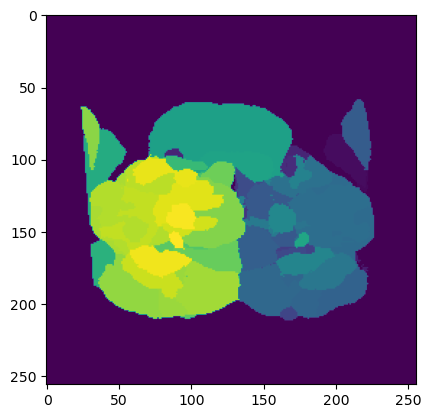

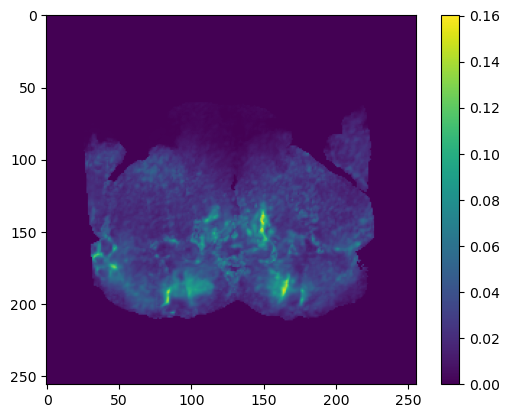

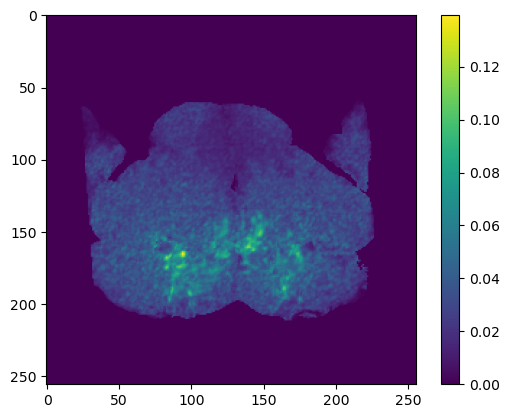

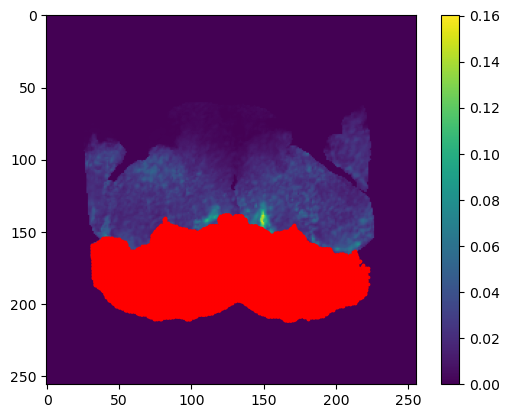

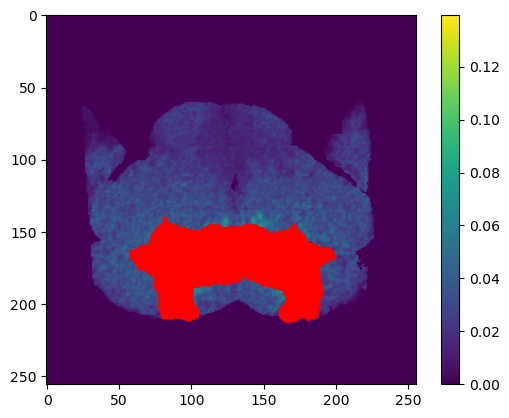

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 6Done!
Row 7Done!
Row 8Done!
Row 9Done!
Row 10Done!
C0 Dim:
10239
C1 Dim:
7240
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 2)
(14, 180, 2)
No_Shuffle
Mean accuracy:0.638

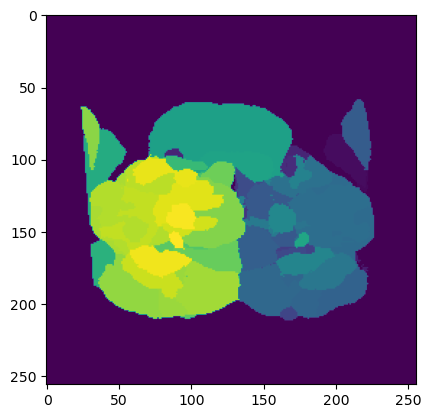

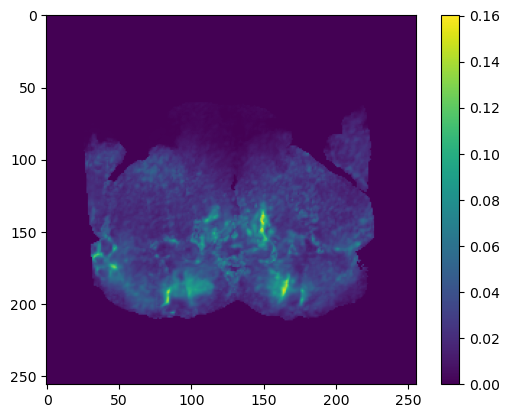

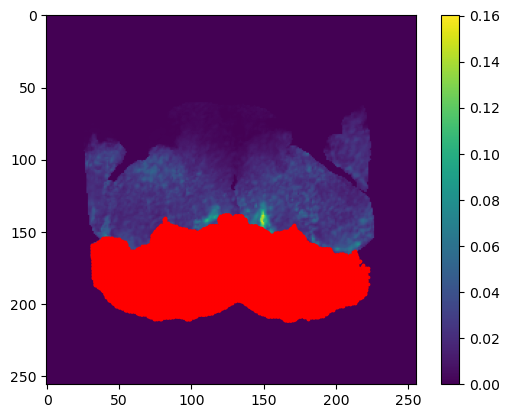

C0 Dim:
10239
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.3166666666666667
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.455555555555

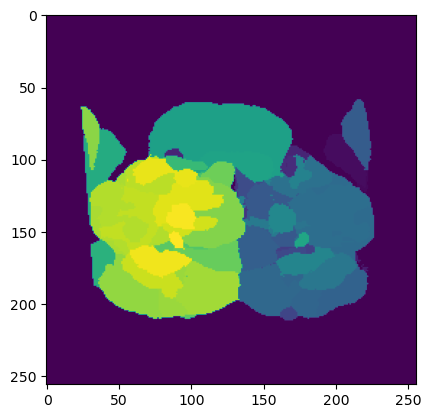

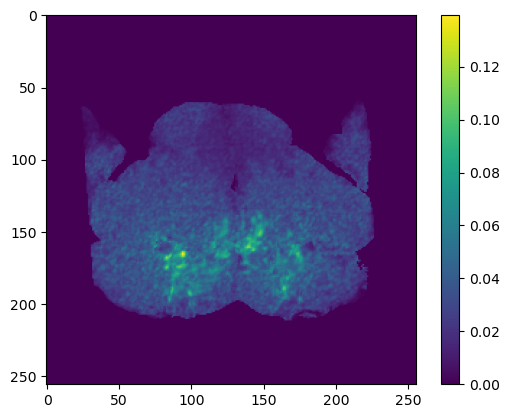

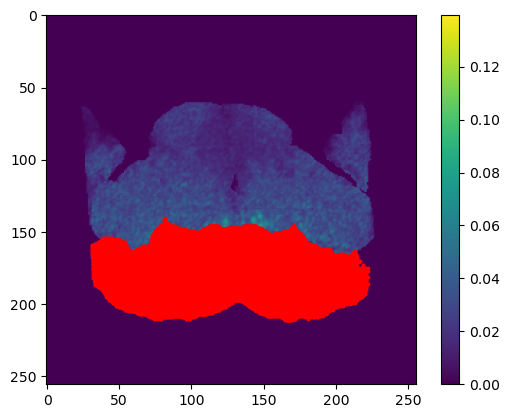

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 6Done!
Row 7Done!
Row 8Done!
Row 9Done!
Row 10Done!
C1 Dim:
11964
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.45
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.26666666666666666
(7740, 2)
(14, 180, 2)
No_Shuffle
Mean accuracy:0.47777777777777775
(7740, 2)
(14, 180, 2)
Shuffle
Mean accuracy:0.2777777777777778
(7740, 5)
(14, 180, 5)
No_Shuffle
Mean accuracy:0.6499999999999999
(7740, 5)
(14, 180, 5)
Shuffle
Mean accuracy:0.2722222222222222
(7740, 15)
(14, 180, 15)
No_Shuffle
Mean accuracy:0.9666666666666666
(7740, 15)
(14, 180, 15)
Shuffle
Mean accuracy:0.3055555555555555
(7740, 29)
(14, 180, 29)
No_Shuffle
Mean accuracy:0.961111111111111
(7740, 29)
(14, 180, 29)
Shuffle
Mean accuracy:0.26111111111111107
(7740, 43)
(14, 180, 43)
No_Shuffle
Mean accuracy:0.9666666666666666
(7740, 43)
(14, 180, 43)
Shuffle
Mean accuracy:0.2666666666666667
(7740, 58)
(14, 180, 58)
No_Shuffle
Mean accuracy:0.9666666666666666
(7740, 58

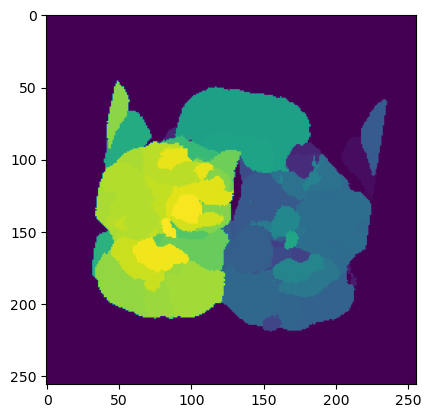

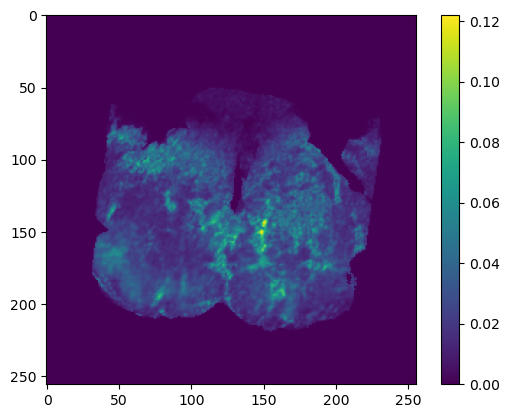

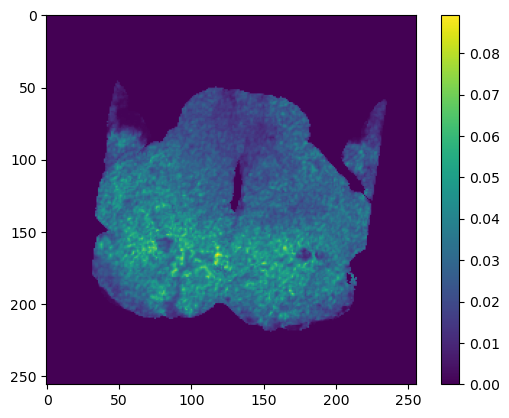

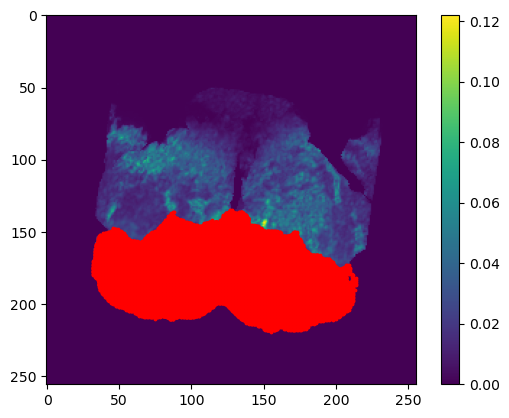

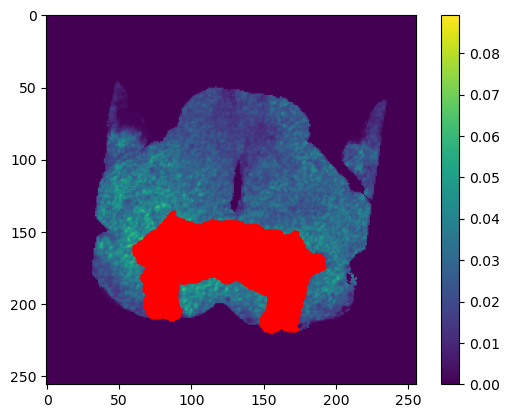

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 6Done!
Row 7Done!
Row 8Done!
Row 9Done!
Row 10Done!
C0 Dim:
12832
C1 Dim:
8656
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.3666666666666667
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2333333333333333
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.3666666666666667
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2333333333333333
(7740, 2)
(14, 180, 2)
No_Shuffle
Mean accuracy:0.45555555555555555
(7740, 2)
(14, 180, 2)
Shuffle
Mean accuracy:0.3222222222222222
(7740, 5)
(14, 180, 5)
No_Shuffle
Mean accuracy:0.85
(7740, 5)
(14, 180, 5)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 18)
(14, 180, 18)
No_Shuffle
Mean accuracy:0.9444444444444444
(7740, 18)
(14, 180, 18)
Shuffle
Mean accuracy:0.2888888888888889
(7740, 35)
(14, 180, 35)
No_Shuffle
Mean accuracy:0.9444444444444444
(7740, 35)
(14, 180, 35)
Shuffle
Mean accuracy:0.3277777777777778
(7740, 54)
(14, 180, 54)
No_Shuffle
Mean accuracy:0.95
(7740, 54)
(14

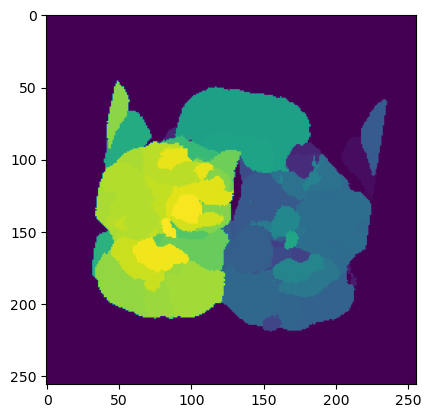

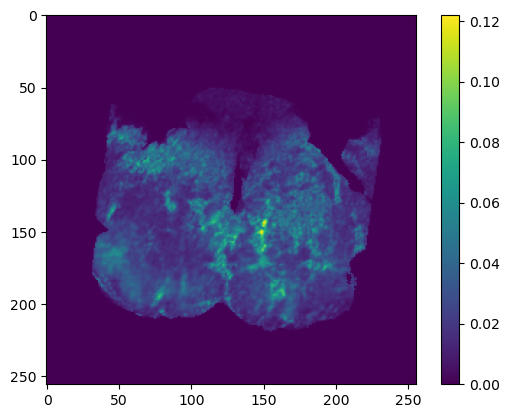

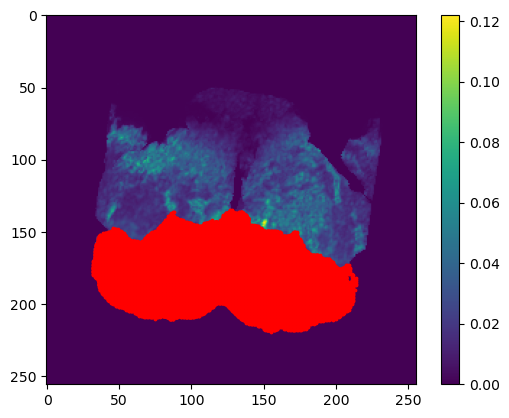

C0 Dim:
12832
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.4333333333333334
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2611111111111112
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.4333333333333334
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2611111111111112
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.4333333333333334
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2611111111111112
(7740, 4)
(14, 180, 4)
No_Shuffle
Mean accuracy:0.8166666666666667
(7740, 4)
(14, 180, 4)
Shuffle
Mean accuracy:0.32222222222222224
(7740, 13)
(14, 180, 13)
No_Shuffle
Mean accuracy:0.85
(7740, 13)
(14, 180, 13)
Shuffle
Mean accuracy:0.3111111111111111
(7740, 27)
(14, 180, 27)
No_Shuffle
Mean accuracy:0.9055555555555556
(7740, 27)
(14, 180, 27)
Shuffle
Mean accuracy:0.3555555555555555
(7740, 41)
(14, 180, 41)
No_Shuffle
Mean accuracy:0.9166666666666666
(7740, 41)
(14, 180, 41)
Shuffle
Mean accuracy:0.3277777777777778
(7740, 57)
(14, 180, 57)
No_Shuffle
Mean accuracy:0.8944444444444445
(

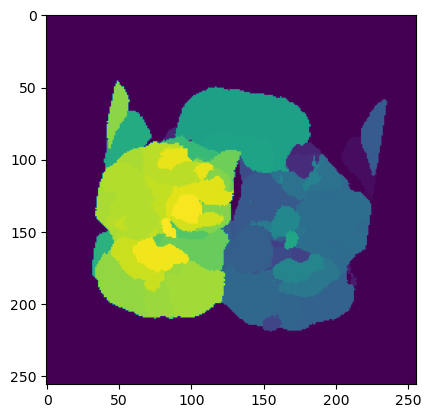

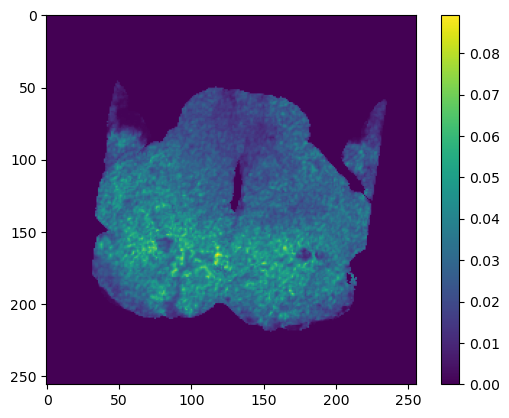

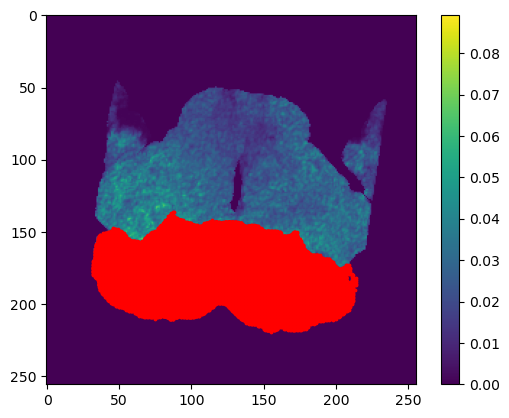

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 6Done!
Row 7Done!
Row 8Done!
Row 9Done!
Row 10Done!
C1 Dim:
14446
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.2111111111111111
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2611111111111111
(7740, 1)
(14, 180, 1)
No_Shuffle
Mean accuracy:0.2111111111111111
(7740, 1)
(14, 180, 1)
Shuffle
Mean accuracy:0.2611111111111111
(7740, 2)
(14, 180, 2)
No_Shuffle
Mean accuracy:0.18888888888888886
(7740, 2)
(14, 180, 2)
Shuffle
Mean accuracy:0.29444444444444445
(7740, 11)
(14, 180, 11)
No_Shuffle
Mean accuracy:0.8166666666666667
(7740, 11)
(14, 180, 11)
Shuffle
Mean accuracy:0.3111111111111111
(7740, 25)
(14, 180, 25)
No_Shuffle
Mean accuracy:0.8833333333333332
(7740, 25)
(14, 180, 25)
Shuffle
Mean accuracy:0.26666666666666666
(7740, 40)
(14, 180, 40)
No_Shuffle
Mean accuracy:0.8222222222222223
(7740, 40)
(14, 180, 40)
Shuffle
Mean accuracy:0.2333333333333333
(7740, 56)
(14, 180, 56)
No_Shuffle
Mean accuracy:0.82777777777

In [4]:
for i_fly in [8,9]:

    #dff0_thresh
    dff0_thresh = dff0_thresh_list[i_fly]
    #######
    fly_selected = i_fly
    print(file_folders[fly_selected])

    ## only 1 fly, 1 condition
    # load data
    file_folder_1 = file_folder_list_1[fly_selected]
    path_file_0 = data_path + '/' + file_folder_1 + '/' + file_name[0] + '.npy'
    path_file_1 = data_path + '/' + file_folder_1 + '/' + file_name[1] + '.npy'
    data_1 = np.load(path_file_0)
    # data_1 = data_1.astype(np.float16)
    data_1 = np.transpose(data_1,[3,4,2,1,0])
    data_2 = np.load(path_file_1)
    # data_2 = data_2.astype(np.float16)
    data_2 = np.transpose(data_2,[3,4,2,1,0])
    size_x = np.size(data_1,0)
    size_y = np.size(data_1,1)
    size_z = np.size(data_1,2)
    num_tp = np.size(data_1,3)
    num_trial = np.size(data_1,4)
    data = np.concatenate((data_1,data_2),axis = 4)
    del data_1,data_2
    data = data.reshape(size_x,size_y,size_z,num_tp,num_trial,num_channel,order = 'F')
    print('load data done! size:')
    print(np.shape(data))

    # load atlas
    file_folder_2 = file_folder_1[:-5]
    atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    print('load atlas done! size:')
    print(np.shape(atlas))
    atlas_eroded= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_eroded_name)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    print('load atlas_eroded done! size:')
    print(np.shape(atlas_eroded))
    # select brain region
    atlas_c1 = np.zeros_like(atlas)
    atlas_c2 = np.zeros_like(atlas)
    atlas_plus = np.zeros_like(atlas)
    for id in region_c1:
        atlas_c1[atlas==id] = id
    for id in region_c2:
        atlas_c2[atlas==id] = id
    for id in region_plus:
        atlas_plus[atlas==id] = id


    # processing
    result_each_fly_path = result_path+ '/' + file_folder_list_3[fly_selected] + '/' + 'voxel-integration-region-SRD-long-formal-ew'
    f = os.path.exists(result_each_fly_path)
    if not f:
        os.makedirs(result_each_fly_path)

    list_list_num_dim = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,num_shuffle_choice))
    list_list_accuracy = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,cv_fold,num_shuffle_choice))
    list_list_f1_weighted = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,cv_fold,num_shuffle_choice))
    list_list_AUC_weighted = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,cv_fold,num_shuffle_choice))
    list_list_accuracy_svm = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,cv_fold,num_shuffle_choice))
    list_list_stim = np.zeros((num_channel_choice,num_thresh_pca_exp_var_1,num_block_size,
                                num_odor_choice,num_thresh_points,len(stim),num_shuffle_choice))


    for j,channel_selected in enumerate(list_channel_selected):
        for l,thresh_pca_exp_var_1 in enumerate(list_thresh_pca_exp_var_1):
            for m,block_size_ratio in enumerate(list_block_size):
                for n,odor_choice in enumerate(list_odor_choice):
                    print('Voxel: ' + 'channel '+str(j))
                    print('pca thresh '+str(thresh_pca_exp_var_1)+',block size '+str(block_size_ratio)+
                        ',odor choice '+str(odor_choice))
                    print(stim)
                    result_save_path = result_each_fly_path + '/' + 'channel_'+str(channel_selected)+\
                            '_pca_thresh_'+str(thresh_pca_exp_var_1)+\
                            '_block_size_'+str(block_size_ratio) + '_odor_choice_'+str(odor_choice)+'_downsample'
                    result_save_path = os.path.abspath(result_save_path)
                    folder = os.path.exists(result_save_path)
                    if not folder:
                        os.makedirs(result_save_path)
                    [x_origin,block_dim,stim_chosen,stim_chosen_shuffled,
                    num_tp,num_trial,x_pca,explained_variance_ratio] = fly_pca_block(data,
                                        atlas, atlas_c1,atlas_c2,atlas_plus,stim,
                                        channel_selected,
                                        odor_choice,
                                        thresh_pca_exp_var_1,block_size_ratio,
                                        block_size_ratio,dff0_thresh,pca_tp_range,svm_tp_range,
                                        if_plot_figure,if_save_figure,result_save_path,result_each_fly_path)  
                    np.save(result_save_path+'/'+'x_origin'+'.npy',x_origin)
                    np.save(result_save_path+'/'+'block_dim'+'.npy',block_dim)
                    
                    for q,thresh_pca_exp_var_2 in enumerate(list_thresh_pca_exp_var_2):
                        for z in range(num_shuffle_choice):
                            if if_shuffle[z] == True:
                                ss = stim_chosen_shuffled
                            else:
                                ss = stim_chosen
                            result_save_path_1 = result_save_path + '/' + if_shuffle_flag[z]
                            folder = os.path.exists(result_save_path_1)
                            if not folder:
                                os.makedirs(result_save_path_1)
                            np.save(result_save_path_1 +'/'+'stim'+'.npy',ss)
                            [num_dim,list_accuracy,list_f1_weighted,
                            list_AUC_weighted,list_accuracy_svm] = odor_classification(x_pca,
                                                            explained_variance_ratio,ss,
                                                            odor_choice,num_tp,num_trial,thresh_pca_exp_var_2,
                                                            lda_tp_selected,svm_tp_range,cv_fold,
                                                            if_plot_figure,if_save_figure,
                                                            result_save_path_1)

                            list_list_num_dim[j,l,m,n,q,z] = num_dim
                            list_list_accuracy[j,l,m,n,q,:,z] = np.array(list_accuracy) 
                            list_list_f1_weighted[j,l,m,n,q,:,z] = np.array(list_f1_weighted)
                            list_list_AUC_weighted[j,l,m,n,q,:,z] = np.array(list_AUC_weighted)
                            list_list_accuracy_svm[j,l,m,n,q,:,z] = np.array(list_accuracy_svm)
                            list_list_stim[j,l,m,n,q,:,z] = np.array(ss)
                            print(if_shuffle_flag[z])
                            print('Mean accuracy:'+str(np.mean(list_accuracy)))


    np.save(result_each_fly_path+'/'+'list_list_num_dim'+'.npy',list_list_num_dim)
    np.save(result_each_fly_path+'/'+'list_list_accuracy'+'.npy',list_list_accuracy)
    np.save(result_each_fly_path+'/'+'list_list_f1_weighted'+'.npy',list_list_f1_weighted)
    np.save(result_each_fly_path+'/'+'list_list_AUC_weighted'+'.npy',list_list_AUC_weighted)
    np.save(result_each_fly_path+'/'+'list_list_accuracy_svm'+'.npy',list_list_accuracy_svm)
    np.save(result_each_fly_path+'/'+'list_list_stim'+'.npy',list_list_stim)

    del data,atlas,atlas_eroded,atlas_c1,atlas_c2,atlas_plus